In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [3]:
local_df = pd.read_csv("../measurements/local_long/map.csv")
map_df = pd.read_csv("../measurements/real_bw_test_15fps/map.csv")
cha_df = pd.read_csv("../measurements/real_bw_test_15fps/characteristic.csv")
mag_df = pd.read_csv("../measurements/real_bw_test_15fps/manager.csv")
static_map_df = pd.read_csv("../measurements/static_test_15fps/map.csv")
static_cha_df = pd.read_csv("../measurements/static_test_15fps/characteristic.csv")

static_low_map_df = pd.read_csv("../measurements/static_test_low/map.csv")
static_low_cha_df = pd.read_csv("../measurements/static_test_low/characteristic.csv")

In [4]:
map_df.head()

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,feasible,sensitivity,map
0,0.25,1,2,6000000.0,0.3,1,-1,0.500000,0.500000
1,0.20,60,1,6000000.0,0.3,2,-1,0.333333,0.250000
2,0.25,3,3,6000000.0,0.3,3,-1,0.500000,0.500000
3,0.05,2,2,6000000.0,0.3,4,-1,0.600000,0.458333
4,0.05,5,2,6000000.0,0.3,5,-1,0.800000,0.708333


In [5]:
quality_level = []

for q in map_df["quality"]:
    if q>50:
        quality_level.append((q-50)/10)
    else:
        quality_level.append(q)

map_df["quality_level"] = quality_level

In [21]:
drop_temp = map_df["drop"].to_numpy()
drop_temp[drop_temp>0.4] =0.4
map_df["drop"] = drop_temp

# Configuration

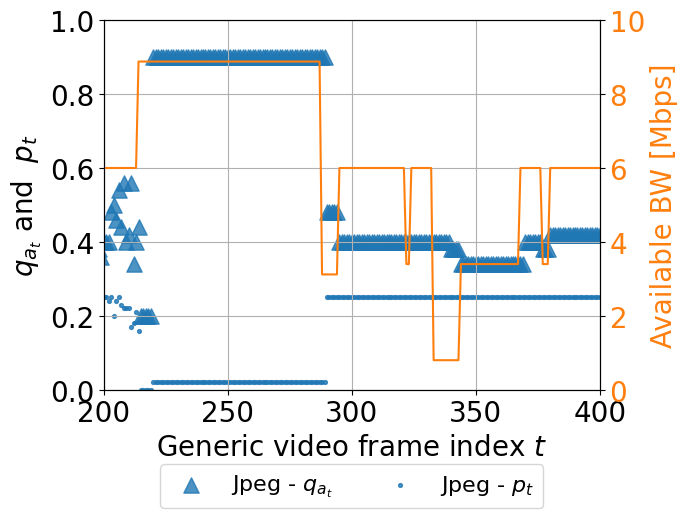

In [6]:
# fig, ax1 = plt.subplots(figsize=(6,4))
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('$q_{a_t}$ and  $p_t$')

# ax1.tick_params(axis='y', labelcolor=color)


# ax1.plot(map_df["frame_id"].to_numpy(),map_df["quality_level"].to_numpy(),color=color)
_jpeg_df = map_df[map_df["technique"] == 1]
ax1.scatter(_jpeg_df["frame_id"].to_numpy(),_jpeg_df["quality_level"].to_numpy()/5,color="tab:blue",marker="^",s=120,alpha = 0.8,label="Jpeg - $q_{a_t}$")
ax1.scatter(_jpeg_df["frame_id"].to_numpy(),_jpeg_df["pruning_thresh"].to_numpy(),color="tab:blue",marker=".",s=30, alpha = 0.8,label="Jpeg - $p_t$")
# _decom_df = map_df[map_df["technique"] == 2]
# ax1.scatter(_decom_df["frame_id"].to_numpy(),_decom_df["quality_level"].to_numpy()/5,color="tab:green",marker="^",s=120, alpha = 0.8,label="Decom - $q_{a_t}$")
# ax1.scatter(_decom_df["frame_id"].to_numpy(),_decom_df["pruning_thresh"].to_numpy(),color="tab:green",marker=".",s=30, alpha = 0.8,label="Decom - $p_t$")
# _reg_df = map_df[map_df["technique"] == 3]
# ax1.scatter(_reg_df["frame_id"].to_numpy(),_reg_df["quality_level"].to_numpy()/5,color="tab:pink",marker="^",s=120,alpha = 0.8,label="Reg - $q_{a_t}$")
# ax1.scatter(_reg_df["frame_id"].to_numpy(),_reg_df["pruning_thresh"].to_numpy(),color="tab:pink",marker=".",s=30,alpha = 0.8,label="Reg - $p_t$")

ax1.grid()
# ax1.plot(map_df["frame_id"].to_numpy(),map_df["pruning_thresh"].to_numpy(), color=color, label="$p_t$")


ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# plt.grid()
ax1.set_xlim([200, 400])
ax2.set_ylim([0,10])
ax1.set_ylim([0,1])
ax1.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.35),fontsize=16)
# ax1.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_config.pdf", bbox_inches='tight')
# ax3 = ax2.twinx() 
# color = 'tab:purple'
# ax3.set_ylabel('Bandwidth [Mbps]', color=color)  # we already handled the x-label with ax1
# ax3.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
# ax3.tick_params(axis='y', labelcolor=color)

# mAP drop

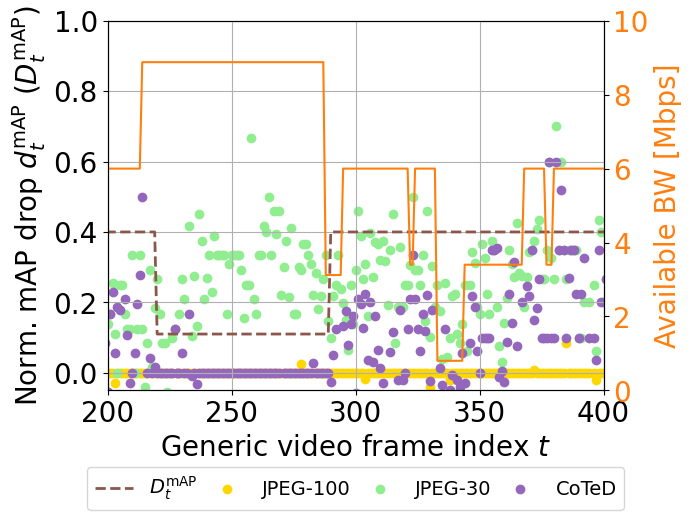

In [34]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel(r'Norm. mAP drop $d^{\text{mAP}}_t$ ($D^{\text{mAP}}_t$)')
# ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(map_df["frame_id"].to_numpy(),map_df["drop"].to_numpy(), linestyle='--', linewidth=2,color="tab:brown",label=r"$D^{\text{mAP}}_t$" )

drops2 = (local_df["map"].to_numpy() - static_map_df["map"].to_numpy())
ax1.scatter(static_map_df["frame_id"].to_numpy(),drops2,label="JPEG-100", color="gold")
drops3 = (local_df["map"].to_numpy() - static_low_map_df["map"].to_numpy())
ax1.scatter(static_low_map_df["frame_id"].to_numpy(),drops3,label="JPEG-30", color="lightgreen")
drops = (local_df["map"].to_numpy() - map_df["map"].to_numpy())
ax1.scatter(map_df["frame_id"].to_numpy(),drops,label="CoTeD", color="tab:purple")
# plt.axhline(y=10, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")

ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend()
ax1.set_xlim([200, 400])
ax1.set_ylim([-0.05,1])
ax2.set_ylim([0,10])
ax1.grid()
ax1.legend(ncol=4,loc='lower center', bbox_to_anchor=(0.5, -0.35),fontsize=14, columnspacing=0.5)

# plt.autoscale(axis="x",tight=True)
plt.savefig("../figures/map_drop_compare.pdf", bbox_inches='tight')

In [23]:
temp= (local_df["map"].to_numpy() - static_low_map_df["map"].to_numpy()) - map_df["drop"].to_numpy()
temp = temp[200:]
len(temp[temp>0])/len(temp)

0.304

In [11]:
# temp  = local_df["map"].to_numpy() - static_map_df["map"].to_numpy()

# temp.std()

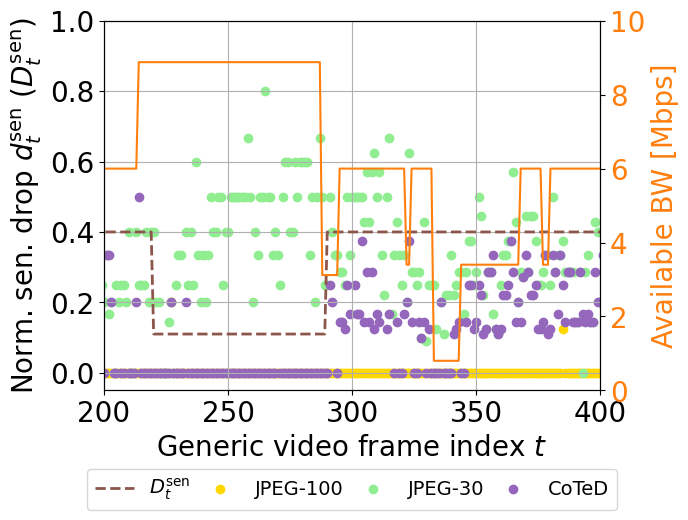

In [35]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel(r'Norm. sen. drop $d^{\text{sen}}_t$ ($D^{\text{sen}}_t$)')
# ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(map_df["frame_id"].to_numpy(),map_df["drop"].to_numpy(), linestyle='--', linewidth=2,color="tab:brown",label=r"$D^{\text{sen}}_t$" )

ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - static_map_df["sensitivity"].to_numpy()),label="JPEG-100", color= "gold")
ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - static_low_map_df["sensitivity"].to_numpy()),label="JPEG-30", color= "lightgreen")

ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy()),label="CoTeD", color= "tab:purple")
# plt.axhline(y=10, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")


ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend()
ax1.set_xlim([200, 400])
ax1.set_ylim([-0.05,1])
ax2.set_ylim([0,10])
ax1.grid()
ax1.legend(ncol=4,loc='lower center', bbox_to_anchor=(0.5, -0.35),fontsize=14,  columnspacing=0.5)
# plt.autoscale(axis="x",tight=True)
plt.savefig("../figures/sen_drop_compare.pdf", bbox_inches='tight')

In [13]:
# temp  = local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy()

# temp.std()

# Compression ratio

In [14]:
cha_df.head()

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,sparsity,decomposability,regularity,pictoriality,compression_ratio,datasize_est,datasize_real,reconstruct_snr,target_cmp,target_snr,consumed_bw
0,0.25,1,2,6000000.0,0.3,1,0.975453,-1,-1,-1,13.000000,26624,96130,1.121313,-1.0,-1.0,-1.0
1,0.20,60,1,6000000.0,0.3,2,0.947404,-1,-1,-1,36.938314,9370,10114,2.627372,-1.0,-1.0,-1.0
2,0.25,3,3,6000000.0,0.3,3,0.991621,-1,-1,-1,238.697931,1450,193472,2.913672,-1.0,-1.0,-1.0
3,0.05,2,2,6000000.0,0.3,4,0.561113,-1,-1,-1,6.500000,53248,169979,6.240761,-1.0,-1.0,-1.0
4,0.05,5,2,6000000.0,0.3,5,0.508702,-1,-1,-1,2.600000,133120,251396,9.867549,-1.0,-1.0,-1.0


In [15]:
mag_df.head()

,frame_id,bandwidth,drop,target_fps,technique,feasibility,target_cmp,target_snr,est_cmp,est_snr,pruning_thresh,quality,jpeg_F,decom_F,reg_F,opt_time
0,1,6000000.0,0.3,15,2,-1,-1.0,-1,-1.0,-1.0,0.25,1,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.285670
1,2,6000000.0,0.3,15,1,-1,-1.0,-1,-1.0,-1.0,0.20,60,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.061249
2,3,6000000.0,0.3,15,3,-1,-1.0,-1,-1.0,-1.0,0.25,3,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.049377
3,4,6000000.0,0.3,15,2,-1,-1.0,-1,-1.0,-1.0,0.05,2,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.093282
4,5,6000000.0,0.3,15,2,-1,-1.0,-1,-1.0,-1.0,0.05,5,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.060929


In [16]:
# raw_tensor_size = 128*26*26*4 # bytes
# cha_df["ratio"] = raw_tensor_size/cha_df["datasize_real"]
# static_cha_df["ratio"] = raw_tensor_size/static_cha_df["datasize_real"]

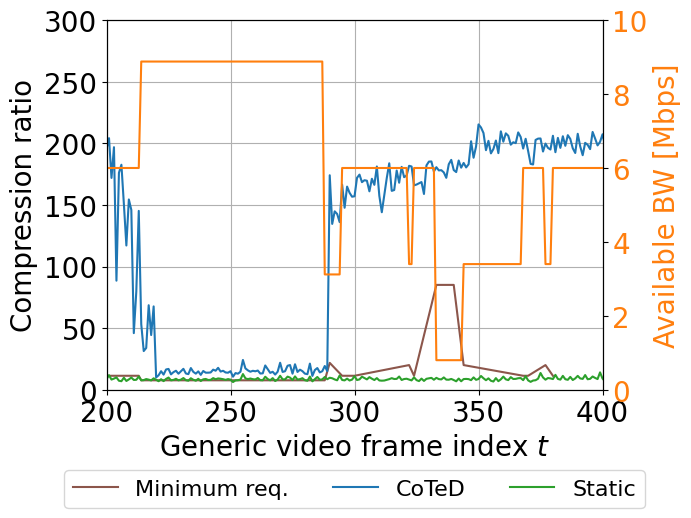

In [17]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('Compression ratio')
# ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(mag_df["frame_id"].to_numpy(),mag_df["target_cmp"].to_numpy(),color="tab:brown", label="Minimum req.")
# ax1.plot(mag_df["frame_id"].to_numpy(),mag_df["est_cmp"].to_numpy(),color="tab:olive", label="Computed")
ax1.plot(cha_df["frame_id"].to_numpy(),cha_df["compression_ratio"].to_numpy(),color="tab:blue", label="CoTeD")
ax1.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["compression_ratio"].to_numpy(),color="tab:green", label="Static")
# plt.plot(cha_df["frame_id"].to_numpy(),raw_tensor_size*8/(cha_df["bandwidth"]*0.01),color="tab:purple",label="Limit")
# plt.plot(cha_df["frame_id"].to_numpy(),cha_df["target_cmp"],color="tab:brown",label="Target(est)")
# plt.plot(cha_df["frame_id"].to_numpy(),cha_df["ratio"],color="tab:orange",label="CoTeD")
# plt.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["ratio"],color="tab:blue",label="Static")
ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.4),fontsize=16)
ax1.set_xlim([200, 400])
ax1.set_ylim([0,300])
ax2.set_ylim([0,10])
ax1.grid()
ax1.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.35),fontsize=16)
# plt.savefig("./images/jpeg_cmp_ratio.pdf", bbox_inches='tight')

# Bandwidth

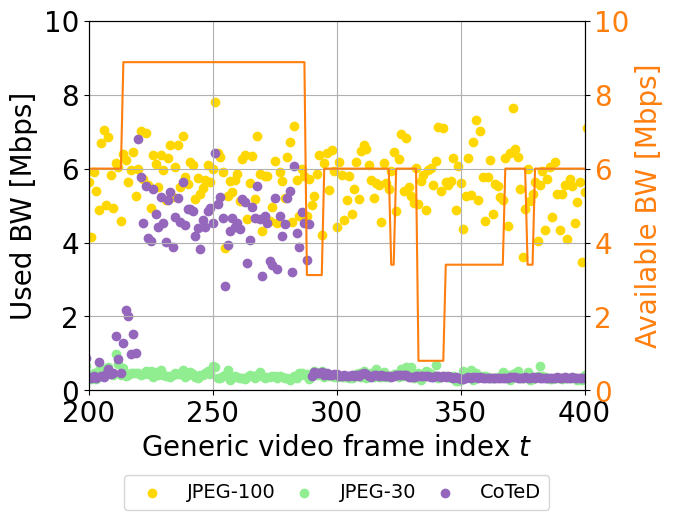

In [ ]:
fig, ax1 = plt.subplots()


# feasibility = map_df["feasible"].to_numpy()
# for i in range(len(feasibility)):
#     if feasibility[i] == 1:
#         plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
#     else:
#         plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)

# ax1.plot(cha_df["frame_id"].to_numpy(),cha_df["bandwidth"]/1e6,color="tab:orange",label="Available")

ax1.scatter(static_cha_df["frame_id"].to_numpy(),static_cha_df["consumed_bw"]/1e6,color="gold",label="JPEG-100")
ax1.scatter(static_cha_df["frame_id"].to_numpy(),static_low_cha_df["consumed_bw"]/1e6,color="lightgreen",label="JPEG-30")
ax1.scatter(cha_df["frame_id"].to_numpy(),cha_df["consumed_bw"]/1e6,color="tab:purple",label="CoTeD")
# plt.plot(static_cha_df["frame_id"].to_numpy(),(static_cha_df["datasize_real"]*8)/(1e6*0.01),color="tab:blue",label="Static")

ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_xlim([200,400])
ax1.set_ylim([0,10])
ax2.set_ylim([0,10])
ax1.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.35),fontsize=14,columnspacing=0.5 )
ax1.grid()
ax1.set_xlabel("Generic video frame index $t$")
ax1.set_ylabel("Used BW [Mbps]")



# plt.autoscale(axis="x",tight=True)
plt.savefig("../figures/bandwidth_compare.pdf", bbox_inches='tight')

In [21]:
1-(cha_df["consumed_bw"].to_numpy().mean()/1e6)/(static_cha_df["consumed_bw"].to_numpy().mean()/1e6)

0.8359370071900536

0.9055475803642987

# SNR

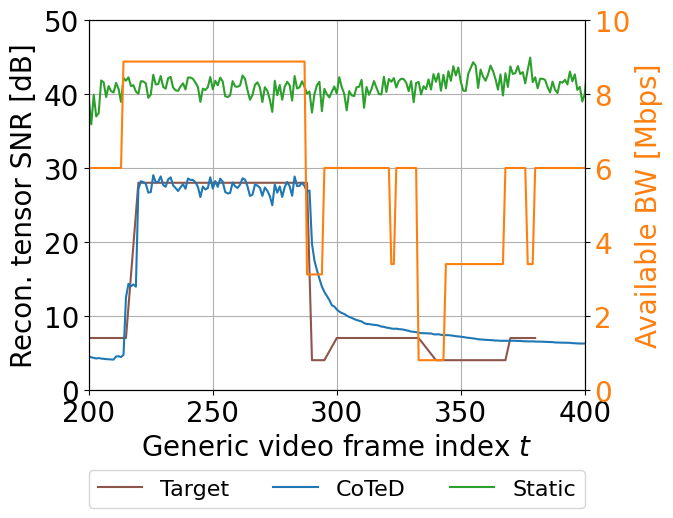

In [31]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('Recon. tensor SNR [dB]')
# ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(mag_df["frame_id"].to_numpy(),mag_df["target_snr"],color="tab:brown",label="Target")
# ax1.plot(mag_df["frame_id"].to_numpy(),mag_df["est_snr"],color="tab:olive",label="Computed")
ax1.plot(cha_df["frame_id"].to_numpy(),cha_df["reconstruct_snr"],color="tab:blue",label="CoTeD")
ax1.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["reconstruct_snr"],color="tab:green",label="Static")
# plt.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["reconstruct_snr"],color="tab:blue",label="Static")

ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.35),fontsize=16)
ax1.set_xlim([200, 400])
ax1.set_ylim([0,50])
ax2.set_ylim([0,10])
ax1.grid()
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_snr.pdf", bbox_inches='tight')